<a href="https://colab.research.google.com/github/HChandeepa/Sri_Lanka_Food_Prices_Analysis/blob/Master/Sri_Lanka_Food_Prices_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# from google.colab import drive, files
# drive.mount('/content/drive')

## Load the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
# import dataset.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/wfp_food_prices_lka.csv')

start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Load Time: {pandas_load_time:.4f} seconds")

Pandas Load Time: 0.0000 seconds


In [6]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       18506 non-null  object 
 1   admin1     18377 non-null  object 
 2   admin2     18377 non-null  object 
 3   market     18506 non-null  object 
 4   latitude   18377 non-null  float64
 5   longitude  18377 non-null  float64
 6   category   18506 non-null  object 
 7   commodity  18506 non-null  object 
 8   unit       18506 non-null  object 
 9   priceflag  18506 non-null  object 
 10  pricetype  18506 non-null  object 
 11  currency   18506 non-null  object 
 12  price      18506 non-null  float64
 13  usdprice   18506 non-null  float64
dtypes: float64(4), object(10)
memory usage: 2.0+ MB


In [7]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [8]:
df.describe()

,latitude,longitude,price,usdprice
count,18377.000000,18377.000000,18506.000000,18506.000000
mean,7.481010,80.568017,581.991651,1.953836
std,0.947683,0.533244,606.396366,1.920414
min,5.952000,79.831700,11.500000,0.060200
25%,6.906044,80.045803,150.000000,0.655825
50%,7.253400,80.515701,320.120000,1.043450
75%,8.038129,81.005890,883.207500,2.930650
max,9.656700,81.700000,3735.420000,11.945700


In [9]:
selected_columns = ['admin1','admin2','market','category','commodity','unit','pricetype']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in admin1: ['Western' 'Eastern' 'Northern' nan 'Central' 'North Central'
 'North Western' 'Sabaragamuwa' 'Southern' 'Uva']


Unique values in admin2: ['Colombo' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mullattivu' 'Vavuniya' nan 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam' 'Ratnapura' 'Galle'
 'Hambantota' 'Matara' 'Badulla' 'Moneragala' 'Gampaha' 'Kalutara'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mulaitivu' 'Vavuniya' 'National Average' 'Kandy' 'Matale'
 'Nuwara Eliya' 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam'
 'Rathnapura' 'Galle' 'Hambantota' 'Matara' 'Badulla' 'Monaragala'
 'Gampaha' 'Kalutara' 'Kegalle' 'Economic Centre-Dambulla'
 'Economic Centre-Pettah' 'Economic Centre-Maradagahamula'
 'Fish market-Negombo' 'Fish market-Peliyagoda'
 'Economic Centre - Peliyagoda' 'Hanguranketha' 'Dehiattakandiya'
 'Ga

In [10]:
df.rename(columns={'admin1': 'province', 'admin2': 'district'}, inplace=True)

In [11]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [12]:
# Filter the dataset to keep only rice-related commodities and retail price type
df = df[df['commodity'].str.contains("Rice", case=False, na=False) & (df['pricetype'] == 'Retail')]

# Print the number of rows after filtering
print(f"Rows after filtering for rice retail data: {df.shape[0]}")

# Show the first few rows of the filtered data
df.head()

Rows after filtering for rice retail data: 2025


,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376
6,5/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.10,0.3455
8,6/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.74,0.3341
11,8/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.78,0.3368


In [13]:
df.shape

(2025, 14)

In [14]:
df.dtypes

,0
date,object
province,object
district,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [15]:
df[['price']].min()

,0
price,22.0


In [16]:
df[['price']].max()

,0
price,282.5


In [17]:
df[['usdprice']].min()

,0
usdprice,0.1965


In [18]:
df[['usdprice']].max()

,0
usdprice,1.6844


## Data Cleaning

In [19]:
# Check for missing values
print(df.isnull().sum())

date          0
province     51
district     51
market        0
latitude     51
longitude    51
category      0
commodity     0
unit          0
priceflag     0
pricetype     0
currency      0
price         0
usdprice      0
dtype: int64


In [20]:
df.dropna(subset=['province', 'district', 'latitude', 'longitude'], inplace=True)

start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Clean Time: {pandas_load_time:.4f} seconds")

Pandas Clean Time: 0.0001 seconds


<ipython-input-20-11a70b71beef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['province', 'district', 'latitude', 'longitude'], inplace=True)


In [21]:
print(df.isnull().sum())

date         0
province     0
district     0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64


### Date Formatting

In [22]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')


start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Convert 'date' column to datetime format Time: {pandas_load_time:.4f} seconds")

Pandas Convert 'date' column to datetime format Time: 0.0000 seconds


<ipython-input-22-54b8ab60824c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')


### Handling Duplicates

In [23]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [24]:
selected_columns = ['province','district','market','category','commodity','unit','pricetype']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Western' 'Eastern' 'Northern' 'Central' 'North Central' 'North Western'
 'Southern' 'Uva' 'Sabaragamuwa']


Unique values in district: ['Colombo' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mullattivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Moneragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Ratnapura' 'Kurunegala'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mulaitivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Monaragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Rathnapura' 'Kurunegala'
 'Kegalle' 'Economic Centre-Pettah' 'Hanguranketha' 'Dehiattakandiya'
 'Galenbindunuwewa' 'Thambuttegama' 'Nikaweratiya' 'Mullativu'
 'Embilipitiya' 'Keppetipola (DEC}' 'Dammbagalla' 'Meegoda(DEC)'
 'Tissamaharama' 'Bandarawela']


Unique

In [25]:
df.shape

(1974, 14)

In [26]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376
6,2004-05-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.10,0.3455
8,2004-06-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.74,0.3341
11,2004-08-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.78,0.3368


In [27]:
df.shape

(1974, 14)

## Feature Engineering

In [28]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [29]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421,2004,2
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376,2004,4
6,2004-05-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.10,0.3455,2004,5
8,2004-06-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.74,0.3341,2004,6
11,2004-08-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.78,0.3368,2004,8


In [30]:
selected_columns = ['province','district','market','category','commodity','unit','pricetype','priceflag','currency']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Western' 'Eastern' 'Northern' 'Central' 'North Central' 'North Western'
 'Southern' 'Uva' 'Sabaragamuwa']


Unique values in district: ['Colombo' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mullattivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Moneragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Ratnapura' 'Kurunegala'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mulaitivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Monaragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Rathnapura' 'Kurunegala'
 'Kegalle' 'Economic Centre-Pettah' 'Hanguranketha' 'Dehiattakandiya'
 'Galenbindunuwewa' 'Thambuttegama' 'Nikaweratiya' 'Mullativu'
 'Embilipitiya' 'Keppetipola (DEC}' 'Dammbagalla' 'Meegoda(DEC)'
 'Tissamaharama' 'Bandarawela']


Unique

In [31]:
# # Save the cleaned data
# df.to_csv("cleaned_data.csv", index=False)

## Predictive Analytics  

In [32]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/cleaned_data.csv')
df2.head()

,date,province,district,market,latitude,longitude,commodity,price,usdprice,year,month
0,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),33.62,0.3421,2004,2
1,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),32.98,0.3376,2004,4
2,5/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),34.10,0.3455,2004,5
3,6/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),33.74,0.3341,2004,6
4,8/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),34.78,0.3368,2004,8


In [33]:
df2.describe()

,latitude,longitude,price,usdprice,year,month
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,7.630079,80.541678,143.436733,0.623366,2017.851064,6.930598
std,1.012619,0.568340,84.485909,0.156488,6.109004,3.341175
min,5.952000,79.838146,22.000000,0.196500,2004.000000,1.000000
25%,6.931944,79.977203,67.080000,0.513125,2015.000000,4.000000
50%,7.294600,80.500000,95.910000,0.630750,2017.000000,7.000000
75%,8.566667,81.005890,230.000000,0.731875,2024.000000,10.000000
max,9.656700,81.700000,282.500000,1.684400,2024.000000,12.000000


In [34]:
df2.dtypes

,0
date,object
province,object
district,object
market,object
latitude,float64
longitude,float64
commodity,object
price,float64
usdprice,float64
year,int64


In [35]:
df2.columns

Index(['date', 'province', 'district', 'market', 'latitude', 'longitude',
       'commodity', 'price', 'usdprice', 'year', 'month'],
      dtype='object')

### Unique Values of the columns

In [36]:
selected_columns = ['province','district','market','commodity']
for columns in selected_columns:
  unique_values = df2[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Western' 'Eastern' 'Northern' 'Central' 'North Central' 'North Western'
 'Southern' 'Uva' 'Sabaragamuwa']


Unique values in district: ['Colombo' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mullattivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Moneragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Ratnapura' 'Kurunegala'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mulaitivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Monaragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Rathnapura' 'Kurunegala'
 'Kegalle' 'Economic Centre-Pettah' 'Hanguranketha' 'Dehiattakandiya'
 'Galenbindunuwewa' 'Thambuttegama' 'Nikaweratiya' 'Mullativu'
 'Embilipitiya' 'Keppetipola (DEC}' 'Dammbagalla' 'Meegoda(DEC)'
 'Tissamaharama' 'Bandarawela']


Unique

### Encoding Using Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['province', 'district', 'market','commodity']

# Apply LabelEncoder to each column
for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

df2.head()

,date,province,district,market,latitude,longitude,commodity,price,usdprice,year,month
0,2/15/2004,8,4,5,6.931944,79.847778,2,33.62,0.3421,2004,2
1,4/15/2004,8,4,5,6.931944,79.847778,2,32.98,0.3376,2004,4
2,5/15/2004,8,4,5,6.931944,79.847778,2,34.10,0.3455,2004,5
3,6/15/2004,8,4,5,6.931944,79.847778,2,33.74,0.3341,2004,6
4,8/15/2004,8,4,5,6.931944,79.847778,2,34.78,0.3368,2004,8


In [38]:
df2.columns

Index(['date', 'province', 'district', 'market', 'latitude', 'longitude',
       'commodity', 'price', 'usdprice', 'year', 'month'],
      dtype='object')

### Unique Values of the columns

In [39]:
selected_columns = ['province','district','market','commodity']
for columns in selected_columns:
  unique_values = df2[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: [8 1 4 0 2 3 6 7 5]


Unique values in district: [ 4  0  8 12 14 24 23  3 18 10 15 19  1 21  5 16 17  6 20  7  2  9 22 13
 11]


Unique values in market: [ 5  0 15 20 22 37 36  4 27 17 23 30  1 32 11 24 26 12 31 13  2 16 33 21
 18  8 14  7 10 34 29 28  9 19  6 25 35  3]


Unique values in commodity: [2 4 0 3 1]




### Year Transformation

In [40]:
# Convert 'date' column to datetime
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')

### Heat map to identify correlation coefficient

price        1.000000
date         0.909136
year         0.908992
usdprice     0.876553
commodity    0.442160
month        0.145732
longitude    0.094124
market       0.061320
district     0.010982
province    -0.067455
latitude    -0.232992
Name: price, dtype: float64


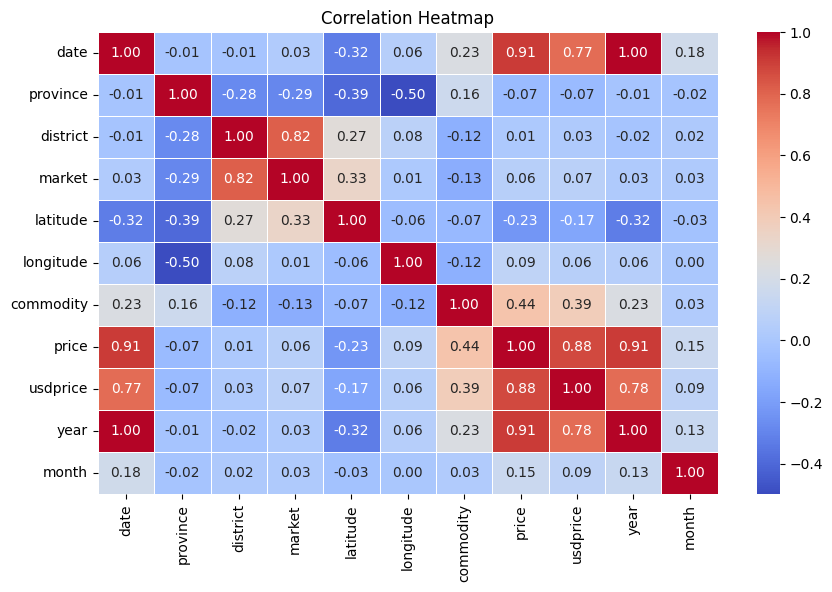

In [41]:
correlation_matrix = df2.corr()
print(correlation_matrix["price"].sort_values(ascending=False))
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()